## This file creates the data frame with a new column for the image names, everything is the same

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
from skimage import io
from tqdm import tqdm

C:\Programs\Anaconda\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


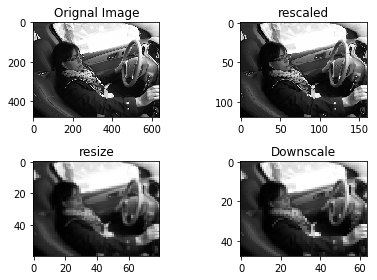

In [3]:
# img=cv2.imread('/Users/Juan/Desktop/CS4662/imgs/test/img_1.jpg',cv2.IMREAD_GRAYSCALE)
# img=cv2.imread('/Users/hollo/Desktop/DataScience/project/imgs/test/img_1.jpg',cv2.IMREAD_GRAYSCALE)
img=cv2.imread('/Users/jesus/Documents/School/College/Computer Science/Class/CS 4662 - Advanced Machince Learning/Project/data/imgs/test/img_1.jpg',cv2.IMREAD_GRAYSCALE)



img_rescale = rescale(img, 1.0/4.0, anti_aliasing = False)
img_resize = resize(img, (img.shape[0] / 8, img.shape[1] / 8),anti_aliasing=True)
img_downscale = downscale_local_mean(img, (10, 10))

fig, axes = plt.subplots(nrows=2, ncols=2)
ax = axes.ravel()

ax[0].imshow(img,cmap="gray")
ax[0].set_title("Orignal Image")

ax[1].imshow(img_rescale,cmap="gray")
ax[1].set_title("rescaled")


ax[2].imshow(img_resize,cmap="gray")
ax[2].set_title("resize")

ax[3].imshow(img_downscale,cmap="gray")
ax[3].set_title("Downscale")


plt.tight_layout()
plt.show()


In [10]:
print(img.shape)
print(img.size)
print(img_downscale.size)
print(img_downscale.shape)
print(img_resize.size)

(480, 640)
307200
3072
(48, 64)
4800


In [4]:
# training path

# DATADIR = "/Users/Juan/Desktop/CS4662/imgs/test"
# DATADIR = "/Users/hollo/Desktop/DataScience/project/imgs/test"
DATADIR = "/Users/jesus/Documents/School/College/Computer Science/Class/CS 4662 - Advanced Machince Learning/Project/data/imgs/test"

# using downsize

In [19]:
rescale_td=[]
resize_td=[]
downscale_td=[]
img_names=[]

def create_testData():
    path = os.listdir(DATADIR)
    for image in tqdm(path):
        img_names.append(image)
        img = os.path.join(DATADIR,image)
        img_array=cv2.imread(img,cv2.IMREAD_GRAYSCALE)
        img_downscale = downscale_local_mean(img_array, (10, 10))            
        downscale_td.append(img_downscale)

In [20]:
create_testData()

100%|███████████████████████████████████████████████████████████████████████████| 79726/79726 [07:22<00:00, 127.63it/s]


In [21]:
a = np.array(downscale_td)

In [22]:
a.shape

print(len(img_names))

79726


In [23]:
a.shape = -1,3072

In [24]:
df_test = pd.DataFrame(a)
df_test['img'] = img_names

#### As you can see, a new column was added for the image name.
This will be useful when creating a submission file

In [25]:
print(df_test.head())

        0       1       2       3       4       5       6      7      8  \
0   53.81   53.13   52.06   51.87   52.94   53.65   53.19  52.47  55.18   
1   71.86   20.83   14.94   51.63   89.04  119.71  106.04  83.25  84.23   
2   33.07   34.94   38.38   39.68   40.61   39.92   38.98  39.67  39.64   
3  146.40  169.88  193.16  212.03  179.19  138.66   73.56  60.89  52.89   
4   47.01   47.87   50.72   54.46   55.45   55.58   81.79  76.72  24.17   

       9       ...          3063    3064    3065    3066    3067   3068  \
0  59.52       ...         99.03  118.10  116.58   28.31   10.27  39.25   
1  79.26       ...         67.50   79.43   69.21   24.39   22.43  19.12   
2  40.43       ...        102.61  122.84  111.47   43.40   26.64  10.95   
3  55.91       ...         23.81   79.15   67.86   62.59   40.24  45.44   
4  37.45       ...        173.81  172.41  162.94  139.07  116.39  95.89   

    3069   3070   3071             img  
0  20.91  11.89  20.12       img_1.jpg  
1  18.65  16.19 

# Export test DataFrame

In [26]:
df_test.to_pickle('testDF-with-name')

# Read test DataFrame

In [27]:
df_test=pd.read_pickle('testDF-with-name')